## Spam Text Detector

### What is the function and usability of this model?

To train the model in understanding and recognizing the pattern of a spam which is presence in the text message file

### Dependencies needed to run the model program

<b> For extraction and data manipulation </b>

Seaborn:        https://seaborn.pydata.org/

Pandas:         https://pandas.pydata.org/

<b> To create prediction model </b>

Scikit Learn:   https://scikit-learn.org/stable/

Tensorflow:     https://www.tensorflow.org/

Keras API:      https://keras.io/

<b> Sketch graph of prediction result </b>

Matplotlib:     https://matplotlib.org/

In [121]:
# Import Pandas library

import pandas as pd

# Read the data source using pandas read_csv() function

data = pd.read_csv('Database/SPAM text message 20170820 - Data.csv')

# Print out the first 5 row of the data

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
# Grouping the data and
# calculate the count, unique, top and freq of the message

data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

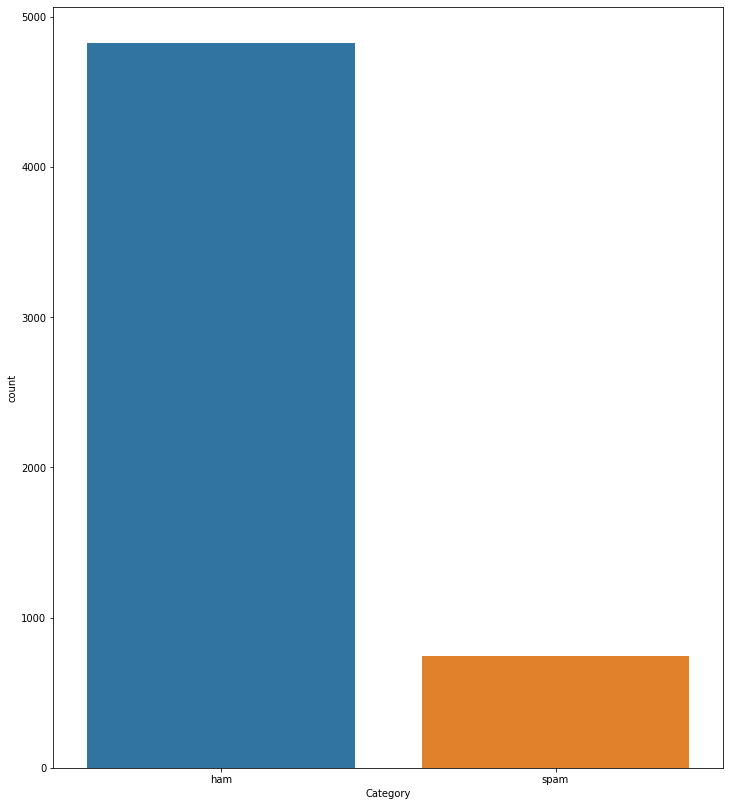

In [123]:
# Import Seaborn library
# Import matplotlib.pyplot

import seaborn as sns
import matplotlib.pyplot as plt

# Print data in a diagram figure ffor visualization

plt.figure(figsize=(12,14))
sns.countplot(data['Category'])

In [124]:
# Extract the ham data and save it
# To ham_msg variable

ham_msg = data[data.Category == 'ham']
print(ham_msg)

# Extract the spam data and save it
# To spam_msg variable

spam_msg = data[data.Category == 'spam']
print(spam_msg)

# Print out the shape of both ham and spam

print(ham_msg.shape, spam_msg.shape)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
6         ham  Even my brother is not like to speak with me. ...
...       ...                                                ...
5565      ham                                       Huh y lei...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[4825 rows x 2 columns]
     Category                                            Message
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
5        spam  FreeMsg Hey there darling it's been 3 week's n...


In [125]:
# extracting the data with a random sequence
# and perserving a maximum length of data as spam_msg

ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)
print(ham_msg)

# Print the description of ham_msg
print(ham_msg.describe().T)

     Category                                            Message
3714      ham  If i not meeting ü all rite then i'll go home ...
1311      ham  I.ll always be there, even if its just in spir...
548       ham                   Sorry that took so long, omw now
1324      ham  I thk 50 shd be ok he said plus minus 10.. Did...
3184      ham  Dunno i juz askin cos i got a card got 20% off...
...       ...                                                ...
4992      ham  We made it! Eta at taunton is 12:30 as planned...
3117      ham                Uncle Abbey! Happy New Year. Abiola
4975      ham  Aiyo u so poor thing... Then u dun wan 2 eat? ...
3505      ham                          Will you be here for food
1983      ham  Hey i will be late... i'm at amk. Need to drin...

[747 rows x 2 columns]
         count unique                     top freq
Category   747      1                     ham  747
Message    747    725  Sorry, I'll call later    8


In [126]:
# Print out the shape of ham_msg and spam_msg

print(ham_msg.shape, spam_msg.shape)

(747, 2) (747, 2)


C:\Users\frent\AppData\Local\Temp\ipykernel_13636\2254321039.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = ham_msg.append(spam_msg).reset_index(drop=True)
c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Messages Types')

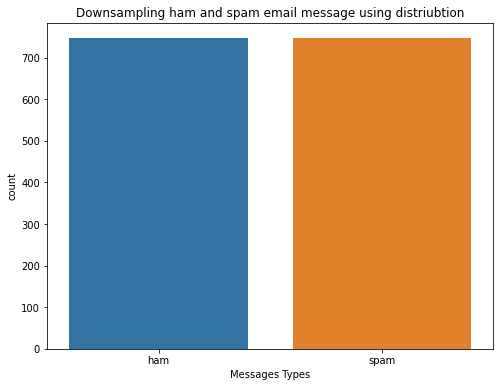

In [127]:
# Append spam_msg array to ham_msg,
# remove the index number without creating a new file
balanced_data = ham_msg.append(spam_msg).reset_index(drop=True)

plt.figure(figsize=(8,6))

# Plot the data into a graph and categorized by category
sns.countplot(balanced_data.Category)

plt.title('Downsampling ham and spam email message using distriubtion')
plt.xlabel('Messages Types')


In [128]:
# Print first five row of the data

balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [129]:
# Create a label to classify the message

balanced_data['label'] = balanced_data['Category'].map({'ham':0, 'spam':1})
balanced_data.head()

,Category,Message,label
0,ham,If i not meeting ü all rite then i'll go home ...,0
1,ham,"I.ll always be there, even if its just in spir...",0
2,ham,"Sorry that took so long, omw now",0
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...,0
4,ham,Dunno i juz askin cos i got a card got 20% off...,0


In [130]:
# Import Train_Test_Split function

from sklearn.model_selection import train_test_split

# Split datasets to train and test 80% and 20%

train_msg, test_msg, train_labels, test_labels = train_test_split(balanced_data['Message'],
balanced_data['label'],
test_size=0.2,
random_state=434)

In [131]:
# Import Tokenizer and Pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 500
oov_tok = '<OOV>'
max_len = 500

# Assigning Tokenizer() function with the maximum length word
# and token for out of the vocabulary words

token = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Updates internal vocab from list of texts

token.fit_on_texts(train_msg)

In [132]:
# Print word index
word_index = token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [133]:
padding_type = 'post'
truncate_type = 'post'

# Transofrm each text to sequence of integers for train msg

Training_seq = token.texts_to_sequences(train_msg)

# Convert to 2D Numpy array with paddings and truncate exceeded text for train msg

Training_pad = pad_sequences(Training_seq, maxlen=50, padding=padding_type, truncating=truncate_type)

In [134]:
# Transform each text to sequence of integers for test msg

Testing_seq = token.texts_to_sequences(test_msg)

# Convert to 2D Numpy array with paddings for train msg

Testing_pad = pad_sequences(Testing_seq, maxlen=50, padding = padding_type, truncating=truncate_type)

In [135]:
# Import Tensorflow library

import tensorflow as tf

# Create model with Embedding Layer, Global Average Pooling, Dense/Fully connected layer and Dropout

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16, input_length=50))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [136]:
# Create a model which calculate the loss entropy between true and predicted labels

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
metrics=['accuracy'],
optimizer='adam')

In [137]:
# Create a terminator if there is no imporvement

epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with another batch of data to help evaluate the loss performance
history = model.fit(Training_pad,
train_labels,
validation_data=(Testing_pad, test_labels),
epochs=epoch,
callbacks=[early_stop],
verbose=2)

Epoch 1/30


C:\Users\frent\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 - 1s - loss: 0.6887 - accuracy: 0.5615 - val_loss: 0.6787 - val_accuracy: 0.7826 - 945ms/epoch - 25ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6529 - accuracy: 0.7448 - val_loss: 0.6110 - val_accuracy: 0.8361 - 112ms/epoch - 3ms/step
Epoch 3/30
38/38 - 0s - loss: 0.5354 - accuracy: 0.8494 - val_loss: 0.4333 - val_accuracy: 0.9064 - 106ms/epoch - 3ms/step
Epoch 4/30
38/38 - 0s - loss: 0.3529 - accuracy: 0.9205 - val_loss: 0.2480 - val_accuracy: 0.9498 - 93ms/epoch - 2ms/step
Epoch 5/30
38/38 - 0s - loss: 0.2134 - accuracy: 0.9498 - val_loss: 0.1549 - val_accuracy: 0.9565 - 93ms/epoch - 2ms/step
Epoch 6/30
38/38 - 0s - loss: 0.1559 - accuracy: 0.9540 - val_loss: 0.1157 - val_accuracy: 0.9699 - 90ms/epoch - 2ms/step
Epoch 7/30
38/38 - 0s - loss: 0.1253 - accuracy: 0.9657 - val_loss: 0.0953 - val_accuracy: 0.9766 - 86ms/epoch - 2ms/step
Epoch 8/30
38/38 - 0s - loss: 0.1112 - accuracy: 0.9640 - val_loss: 0.0890 - val_accuracy: 0.9766 - 92ms/epoch - 2ms/step
Epoch 9/30
38/38 - 0s - loss: 0

In [138]:
# Test the model

model.evaluate(Testing_pad, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9766


[0.07076886296272278, 0.9765886068344116]

Text(0.5, 0, 'epoch')

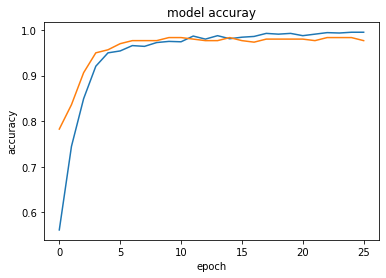

In [139]:
# Plotting the model

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuray')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [140]:
# Main Function

def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))

def main():
    spam_sample = []
    with open('sample01.txt','r') as textFile:
        textSample = textFile.read()
        spam_sample.insert(0,textSample)
        print(predict_spam(spam_sample))

main()

1/1 [==============================] - 0s 73ms/step
[[0.99534535]]
